<a href="https://colab.research.google.com/github/gopaps/Robotika_1103213098/blob/main/week%2012/week_12_Anda_Figo_Haq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementasi Filter Kalman untuk Estimasi Posisi Robot

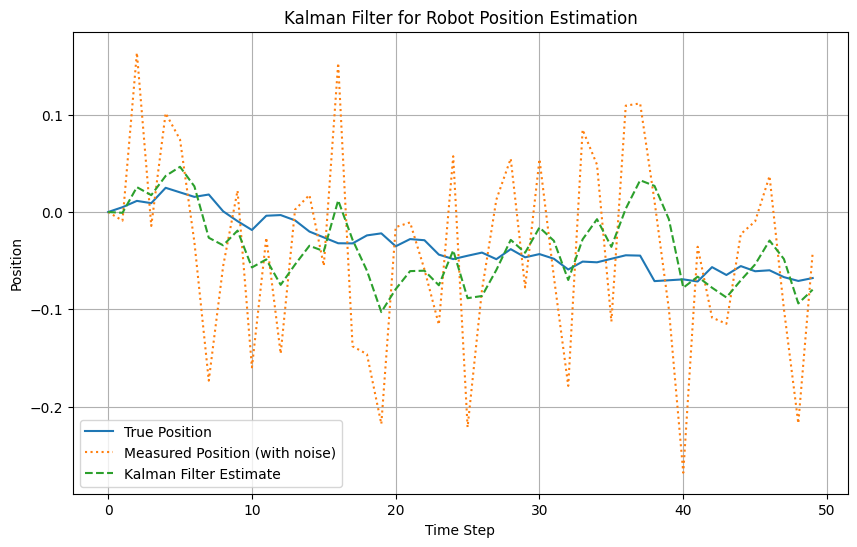

Analisis:
Kalman Filter berhasil mengestimasi posisi robot dengan baik meskipun data pengukuran memiliki noise.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulasi Filter Kalman untuk Estimasi Posisi Robot
# Inisialisasi parameter
np.random.seed(42)  # Reproducibility
n_steps = 50  # Jumlah langkah simulasi
x_true = np.zeros(n_steps)  # Posisi sebenarnya
z_meas = np.zeros(n_steps)  # Pengukuran posisi (dengan noise)

# Parameter sistem dan noise
A = 1  # Faktor transisi posisi
H = 1  # Observasi posisi
Q = 0.01  # Variansi proses noise
R = 0.1  # Variansi pengukuran noise

# Inisialisasi Kalman Filter
x_est = np.zeros(n_steps)  # Estimasi posisi
P = np.zeros(n_steps)  # Variansi estimasi posisi
x_pred = 0  # Prediksi awal posisi
P_pred = 1  # Variansi prediksi awal

# Proses simulasi posisi sebenarnya dan pengukuran
for t in range(1, n_steps):
    x_true[t] = A * x_true[t-1] + np.random.normal(0, Q)  # Posisi sebenarnya
    z_meas[t] = H * x_true[t] + np.random.normal(0, R)  # Pengukuran dengan noise

# Kalman Filter Estimation
for t in range(1, n_steps):
    # 1. Prediksi
    x_pred = A * x_est[t-1]
    P_pred = A * P[t-1] * A + Q

    # 2. Update (Koreksi)
    K = P_pred * H / (H * P_pred * H + R)  # Gain Kalman
    x_est[t] = x_pred + K * (z_meas[t] - H * x_pred)  # Estimasi posisi
    P[t] = (1 - K * H) * P_pred  # Variansi estimasi

# Plot hasil estimasi dan pengukuran
plt.figure(figsize=(10, 6))
plt.plot(x_true, label='True Position')
plt.plot(z_meas, label='Measured Position (with noise)', linestyle='dotted')
plt.plot(x_est, label='Kalman Filter Estimate', linestyle='--')
plt.title('Kalman Filter for Robot Position Estimation')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

# Analisis hasil simulasi
print("Analisis:")
print("Kalman Filter berhasil mengestimasi posisi robot dengan baik meskipun data pengukuran memiliki noise.\n")


# Implementasi Filter Partikel untuk Estimasi Posisi Robot

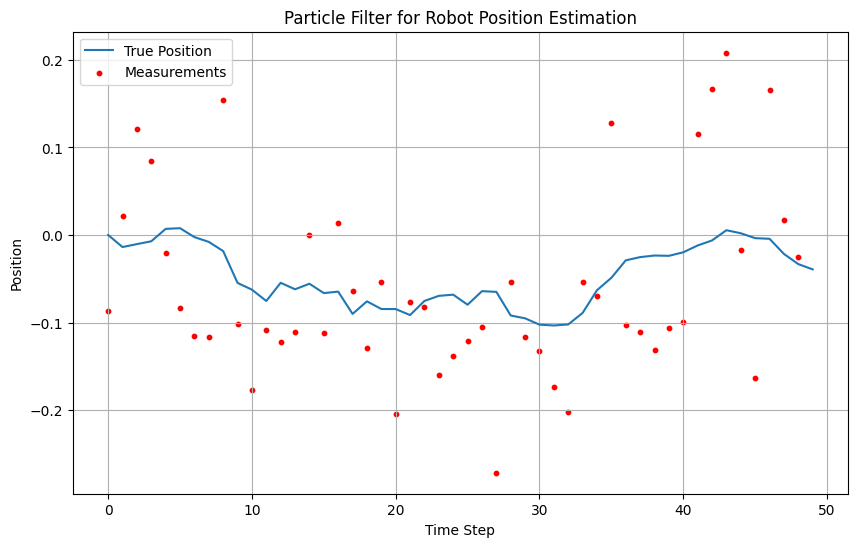

Analisis:
Particle Filter menghasilkan estimasi posisi dengan pendekatan berbasis partikel, menangkap dinamika sistem dengan baik.


In [ ]:
# Simulasi Filter Partikel
n_particles = 1000  # Jumlah partikel
x_particles = np.random.uniform(-1, 1, n_particles)  # Inisialisasi partikel
weights = np.ones(n_particles) / n_particles  # Bobot partikel (sama rata)

# Fungsi Resampling
def resample(weights):
    indices = np.random.choice(np.arange(n_particles), size=n_particles, p=weights)
    return indices

# Simulasi gerakan robot dan pengukuran
x_true_pf = [0]
z_meas_pf = []
for t in range(1, n_steps):
    x_true_pf.append(x_true_pf[-1] + np.random.normal(0, Q))  # Posisi sebenarnya
    z_meas_pf.append(x_true_pf[-1] + np.random.normal(0, R))  # Pengukuran

    # Prediksi posisi partikel
    x_particles += np.random.normal(0, Q, n_particles)

    # Update bobot berdasarkan pengukuran
    weights *= np.exp(-0.5 * ((z_meas_pf[-1] - x_particles)**2) / R)
    weights /= np.sum(weights)

    # Resampling partikel
    indices = resample(weights)
    x_particles = x_particles[indices]
    weights = np.ones(n_particles) / n_particles

    # Estimasi posisi sebagai rata-rata partikel
    x_est_pf = np.mean(x_particles)

# Plot hasil simulasi
plt.figure(figsize=(10, 6))
plt.plot(x_true_pf, label='True Position')
plt.scatter(range(len(z_meas_pf)), z_meas_pf, color='red', s=10, label='Measurements')
plt.title('Particle Filter for Robot Position Estimation')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

print("Analisis:")
print("Particle Filter menghasilkan estimasi posisi dengan pendekatan berbasis partikel, menangkap dinamika sistem dengan baik.")


# Implementasi Localization dengan Sensor IMU dan LiDAR

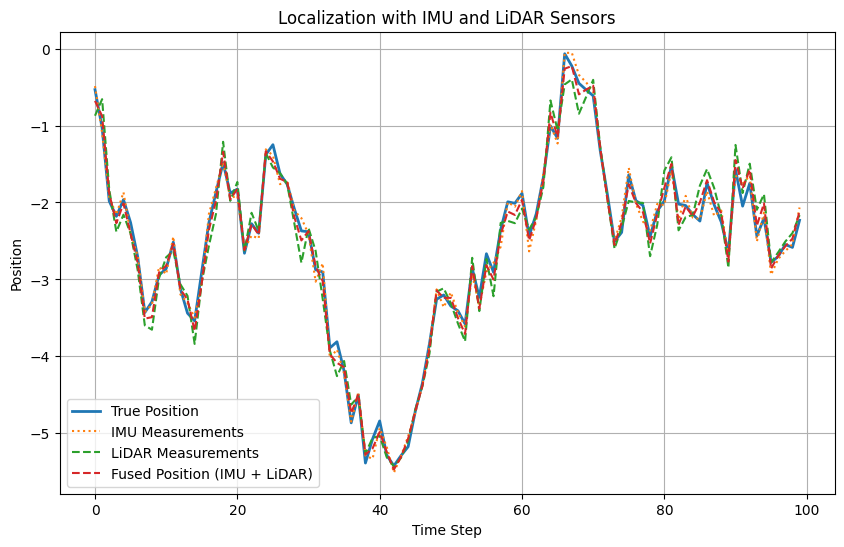

Analisis:
Menggabungkan data dari sensor IMU dan LiDAR menghasilkan estimasi posisi yang lebih akurat dibandingkan pengukuran sensor secara individual.


In [ ]:
# Simulasi Localization dengan Sensor IMU dan LiDAR
# Parameter
n_steps = 100
true_positions = np.cumsum(np.random.normal(0, 0.5, n_steps))  # Posisi sebenarnya robot
imu_noise = 0.1  # Noise untuk sensor IMU
lidar_noise = 0.2  # Noise untuk sensor LiDAR

# Simulasi data dari sensor IMU dan LiDAR
imu_measurements = true_positions + np.random.normal(0, imu_noise, n_steps)
lidar_measurements = true_positions + np.random.normal(0, lidar_noise, n_steps)

# Integrasi sensor menggunakan rata-rata pengukuran (Sensor Fusion sederhana)
fused_positions = (imu_measurements + lidar_measurements) / 2

# Plot hasil simulasi
plt.figure(figsize=(10, 6))
plt.plot(true_positions, label='True Position', linewidth=2)
plt.plot(imu_measurements, label='IMU Measurements', linestyle='dotted')
plt.plot(lidar_measurements, label='LiDAR Measurements', linestyle='dashed')
plt.plot(fused_positions, label='Fused Position (IMU + LiDAR)', linestyle='--')
plt.title('Localization with IMU and LiDAR Sensors')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

# Analisis hasil
print("Analisis:")
print("Menggabungkan data dari sensor IMU dan LiDAR menghasilkan estimasi posisi yang lebih akurat dibandingkan pengukuran sensor secara individual.")


# Implementasi Simulasi Extended Kalman Filter (EKF) untuk Navigation

<ipython-input-17-8b5eaa42bf2a>:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z_meas.append(float(z))  # Pastikan z[0] adalah skalar


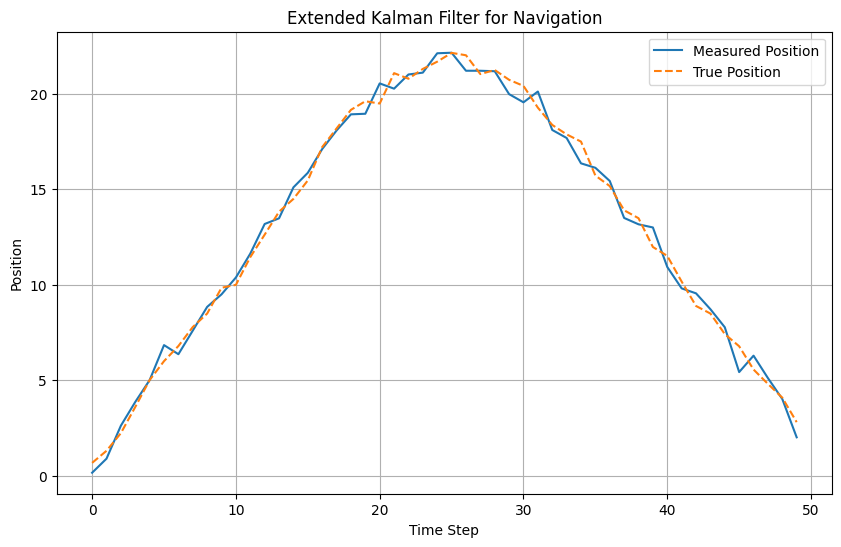

Analisis:
Extended Kalman Filter memperluas Kalman Filter standar untuk menangani sistem nonlinear seperti navigasi robot dengan kontrol gerak.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extended Kalman Filter (EKF) untuk navigasi
# Fungsi nonlinear sistem (gerakan robot)
def f(x, u):
    return np.array([x[0] + u[0] * np.cos(x[1]), x[1] + u[1]])  # x[0]: posisi, x[1]: orientasi

# Fungsi observasi (sensor)
def h(x):
    return np.array([x[0]])  # Sensor hanya mengukur posisi

# Jacobian dari fungsi sistem dan observasi
def F_jacobian(x, u):
    x1 = x[1]  # Ambil elemen orientasi x[1]
    return np.array([[1, -u[0] * np.sin(x1)], [0, 1]])

def H_jacobian(x):
    return np.array([[1, 0]])

# Inisialisasi EKF
x_est = np.array([0.0, 0.0])  # State: [posisi, orientasi]
P = np.eye(2)  # Variansi state
Q = np.diag([0.1, 0.01])  # Variansi proses
R = np.array([[0.5]])  # Variansi pengukuran

# Simulasi gerakan dan navigasi
n_steps = 50
u = np.array([1, 0.1])  # Input gerakan (kecepatan, perubahan orientasi)
z_meas = []
true_positions = []

for t in range(n_steps):
    # Gerakan sebenarnya
    x_true = f(x_est, u) + np.random.multivariate_normal([0, 0], Q)
    z = h(x_true) + np.random.normal(0, np.sqrt(R[0, 0]))  # Pengukuran dengan noise

    # Prediksi EKF
    x_pred = f(x_est, u)
    F = F_jacobian(x_est.flatten(), u)  # Pastikan x_est adalah array 1D
    P_pred = F @ P @ F.T + Q

    # Update EKF
    H = H_jacobian(x_pred)
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)
    x_est = x_pred + K @ (z - h(x_pred))
    P = (np.eye(2) - K @ H) @ P_pred

    # Simpan data untuk plot
    z_meas.append(float(z))  # Pastikan z[0] adalah skalar
    true_positions.append(float(x_true[0]))  # Pastikan x_true[0] adalah skalar

# Plot hasil EKF
plt.figure(figsize=(10, 6))
plt.plot(range(n_steps), z_meas, label='Measured Position')
plt.plot(range(n_steps), true_positions, label='True Position', linestyle='--')
plt.title('Extended Kalman Filter for Navigation')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

# Analisis hasil
print("Analisis:")
print("Extended Kalman Filter memperluas Kalman Filter standar untuk menangani sistem nonlinear seperti navigasi robot dengan kontrol gerak.")


# Implementasi Particle Filter untuk Navigation

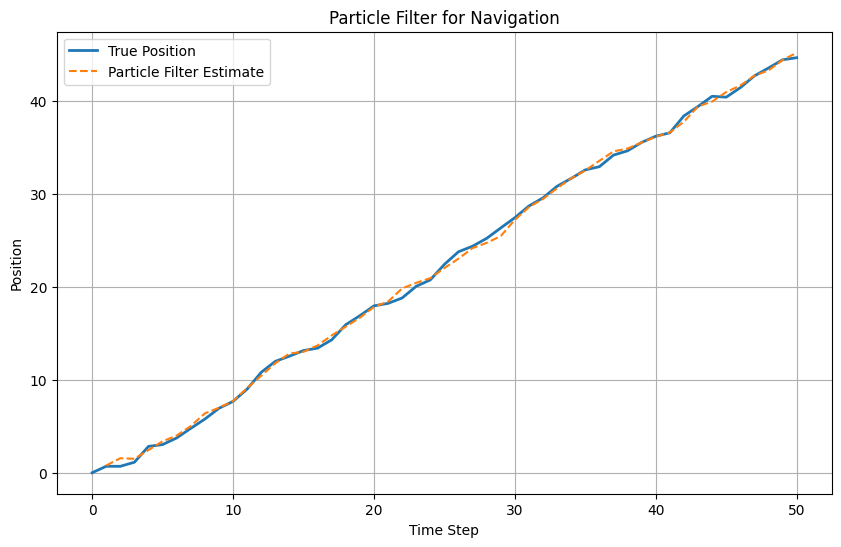

Analisis:
Particle Filter efektif digunakan untuk navigasi berbasis probabilistik dengan partikel yang mencakup dinamika sistem.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Particle Filter untuk Navigasi
n_particles = 1000
x_particles = np.random.uniform(-5, 5, n_particles)  # Inisialisasi posisi partikel
weights = np.ones(n_particles) / n_particles
x_true = [0]  # Posisi sebenarnya
z_meas = []

n_steps = 50  # Jumlah langkah simulasi

# Simulasi navigasi
for t in range(n_steps):
    # Gerakan sebenarnya
    x_true.append(x_true[-1] + np.random.normal(1, 0.5))
    z = x_true[-1] + np.random.normal(0, 0.5)  # Pengukuran

    # Prediksi partikel
    x_particles += np.random.normal(1, 0.5, n_particles)

    # Update bobot
    weights *= np.exp(-0.5 * ((z - x_particles)**2) / 0.5)
    weights /= np.sum(weights)

    # Resampling
    indices = np.random.choice(np.arange(n_particles), n_particles, p=weights)
    x_particles = x_particles[indices]
    weights = np.ones(n_particles) / n_particles

    # Estimasi posisi
    z_meas.append(np.mean(x_particles))

# Plot hasil Particle Filter
plt.figure(figsize=(10, 6))
plt.plot(range(n_steps + 1), x_true, label='True Position', linewidth=2)
plt.plot(range(1, n_steps + 1), z_meas, label='Particle Filter Estimate', linestyle='--')
plt.title('Particle Filter for Navigation')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

# Analisis hasil
print("Analisis:")
print("Particle Filter efektif digunakan untuk navigasi berbasis probabilistik dengan partikel yang mencakup dinamika sistem.")
